Animation creation time: 1.1637649536132812
GIF saving time: 281.4351370334625


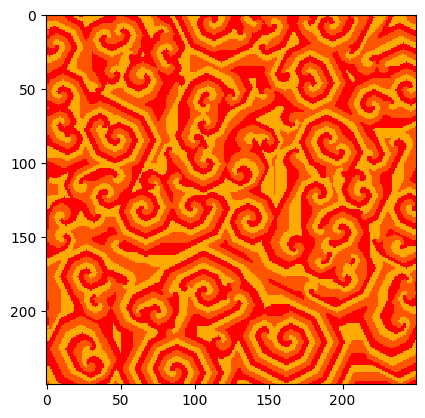

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

# Range/Threshold/States/Neighborhood
# 1/3/3/M (David Griffeath)


data = np.random.randint(0, 3, (250, 250))



def evolution(data):
    new_data = np.zeros(data.shape)

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            neighbors = 0
            
            # moore neighborhood of range 1
            neighbors = np.sum(data[i-1:i+2, j-1:j+2] == (data[i, j] + 1) % 3)

            new_data[i, j] = (data[i, j] + 1) % 3 if neighbors >= 3 else data[i, j]

    data[:] = new_data


# make a matplotlib animation
fig, ax = plt.subplots()

# make a custom cmap
im = ax.imshow(data, cmap='autumn', interpolation='nearest', vmin=0, vmax=3)

def update(frame):
    evolution(data)
    im.set_array(data)
    return im,

start = time.time()
ani = animation.FuncAnimation(fig, update, frames=500, interval=100, blit=True)
print("Animation creation time:", time.time() - start)


start = time.time()
ani.save('Cyclic_1_3_3_M.gif', writer='pillow', fps=10, dpi=80, savefig_kwargs={'facecolor': 'black', 'pad_inches': 0})
print("GIF saving time:", time.time() - start)